<a href="https://colab.research.google.com/github/rizkyjh/finalterm-machine-learning/blob/main/finalterm_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- CELL 2: THE TRAINING CODE ---
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import matplotlib.pyplot as plt

# --- 1. CONFIGURATION ---
# We use r"..." so Windows doesn't get confused by the backslashes
dataset_path = r"C:\Tugas\tubes\ML\finalterm\FishImgDataset"

train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')

# Faster Batch Size for your local PC
BATCH_SIZE = 64
IMG_SIZE = (224, 224)

print(f"--- Switching to High-Speed Local Pipeline (Batch Size: {BATCH_SIZE}) ---")
print(f"Reading data from: {dataset_path}")

# --- 2. FAST DATA LOADING ---
# Load Training Data
train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=True
)

# Load Validation Data
val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)

# Save class names BEFORE optimizing
class_names = train_ds_raw.class_names
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")

# Optimize speed (Prefetching)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds_raw.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds_raw.prefetch(buffer_size=AUTOTUNE)

# --- 3. MODEL WITH GPU AUGMENTATION ---
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

def build_fast_cnn():
    model = models.Sequential([
        layers.Input(shape=(224, 224, 3)),
        data_augmentation,
        layers.Rescaling(1./255),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_fast_cnn()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print("\n--- Starting Training ---")
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

print("Done! You can now plot your results.")

c:\Users\FireCalm\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


--- Switching to High-Speed Local Pipeline (Batch Size: 64) ---
Reading data from: C:\Tugas\tubes\ML\finalterm\FishImgDataset
Found 8819 files belonging to 31 classes.
Found 2751 files belonging to 31 classes.
Number of classes: 31

--- Starting Training ---
Epoch 1/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.1510 - loss: 3.2586 - val_accuracy: 0.2323 - val_loss: 2.8794
Epoch 2/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.2243 - loss: 2.9060 - val_accuracy: 0.3053 - val_loss: 2.5243
Epoch 3/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.2650 - loss: 2.6831 - val_accuracy: 0.3388 - val_loss: 2.3050
Epoch 4/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.3007 - loss: 2.4998 - val_accuracy: 0.3948 - val_loss: 2.1798
Epoch 5/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.3172 - loss: 2.4128 - val_accuracy: 0.4068 - val_loss: 2.0746
Epoch 6/10
138/138 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.3329 - loss: 2.3419 - val_acc

In [ ]:
import os

# 1. Save the model
model_name = 'fish_classifier_final.keras'
model.save(model_name)

# 2. Tell me exactly where it is
current_folder = os.getcwd()
print(f"✅ Model saved successfully!")
print(f"📂 Location: {os.path.join(current_folder, model_name)}")

✅ Model saved successfully!
📂 Location: c:\Users\FireCalm\AppData\Local\Programs\Microsoft VS Code\fish_classifier_final.keras


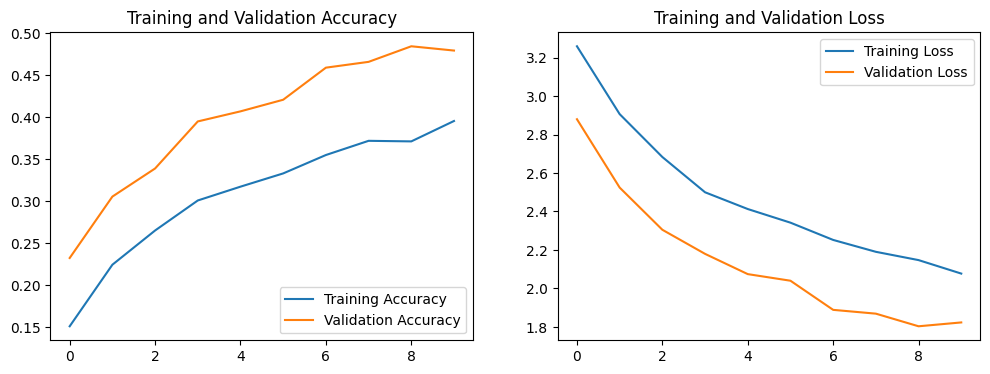


Generating Confusion Matrix... (This might take a moment)


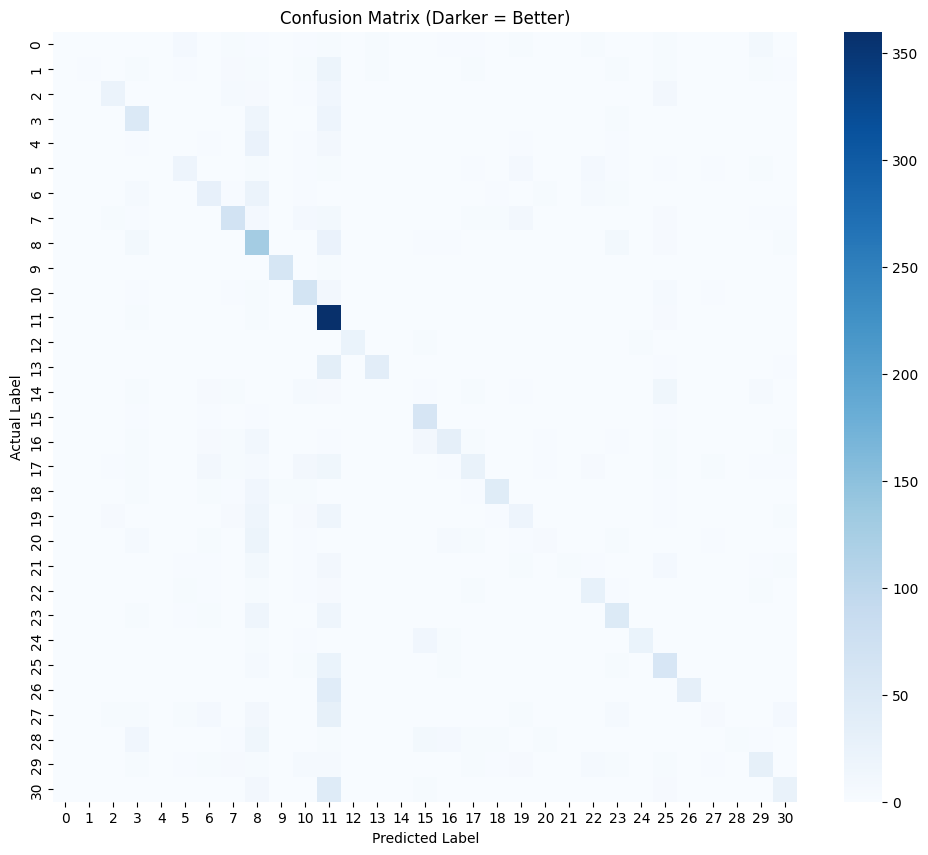


--- Classification Report ---
                       precision    recall  f1-score   support

               Bangus       0.50      0.02      0.04        52
        Big Head Carp       1.00      0.03      0.06        63
   Black Spotted Barb       0.51      0.35      0.42        63
              Catfish       0.40      0.54      0.46        97
       Climbing Perch       0.33      0.02      0.04        48
 Fourfinger Threadfin       0.41      0.32      0.36        60
       Freshwater Eel       0.34      0.36      0.35        84
       Glass Perchlet       0.59      0.55      0.57       124
                 Goby       0.34      0.68      0.45       189
            Gold Fish       0.92      0.92      0.92        65
              Gourami       0.49      0.67      0.56        97
           Grass Carp       0.49      0.95      0.64       378
 Green Spotted Puffer       0.96      0.68      0.79        34
          Indian Carp       0.81      0.48      0.60        81
  Indo-Pacific Tarpon  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# --- 1. PLOT ACCURACY & LOSS GRAPHS ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# --- 2. GENERATE CONFUSION MATRIX ---
# This shows exactly which fish get confused with which other fish
print("\nGenerating Confusion Matrix... (This might take a moment)")

# Get predictions for the entire validation set
y_pred = []  # Store predicted labels
y_true = []  # Store true labels

for images, labels in val_ds:
    predictions = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(np.argmax(labels, axis=1))

# Plot the Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Darker = Better)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Print detailed scores (Precision/Recall)
print("\n--- Classification Report ---")
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


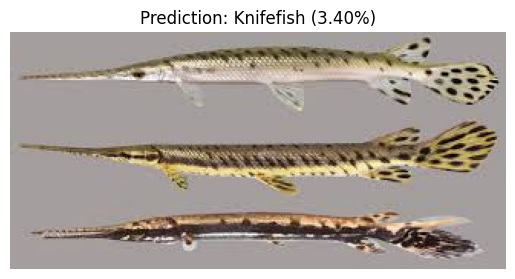

Raw Prediction Scores: [[0.03816068 0.03882567 0.02389063 0.01772613 0.02250403 0.01920312
  0.02335557 0.04788268 0.02838017 0.0048237  0.05602953 0.04166243
  0.01498525 0.02913767 0.04017878 0.02449847 0.04871472 0.08607131
  0.02242307 0.02585963 0.04732611 0.02832907 0.02260985 0.01341487
  0.02944024 0.02594291 0.0190241  0.04518653 0.03971215 0.04338197
  0.03131894]]


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. PATH TO IMAGE
# Make sure this points to a fish that IS NOT a "Long Snouted" one to test properly
img_path = r"C:\Tugas\tubes\ML\finalterm\fish3.jpg"

img = cv2.imread(img_path)

if img is not None:
    # 2. Resize
    img_resized = cv2.resize(img, (224, 224))

    # 3. NO DIVISION! Just convert to float.
    # The model expects 0-255 values because it has a Rescaling layer inside.
    img_array = img_resized.astype("float32")

    # 4. Create Batch
    img_array = tf.expand_dims(img_array, 0)

    # 5. Predict
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # 6. Result
    predicted_class = class_names[np.argmax(predictions)]
    confidence = 100 * np.max(score)

    # Show
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis("off")
    plt.show()

    # Debug: Print the raw scores to see if they are all identical
    print("Raw Prediction Scores:", predictions)

else:
    print("Could not load image. Check path.")